In [1]:
# Problem Statement
# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
# Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) 
# all other variable will be independent in the analysis.

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb

In [3]:
# reading csv file
data=pd.read_csv('Company_Data.csv')

In [4]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
data['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

## EDA

In [6]:
# target variable : sale
data.shape

(400, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
data[data.duplicated()] # no duplicates

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [9]:
# Label Encoding
label_encoder=preprocessing.LabelEncoder()
data['ShelveLoc']=label_encoder.fit_transform(data['ShelveLoc'])
data['Urban']=label_encoder.fit_transform(data['Urban'])
data['US']=label_encoder.fit_transform(data['US'])

In [10]:
data.head() 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [11]:
data.info()    # data type converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [12]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [23]:
data.corr()

C:\Users\sycmy\AppData\Local\Temp\ipykernel_28500\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


In [14]:
data.insert(11,'sales_class',str)

In [15]:
data.head(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_class
0,9.5,138,73,11,276,120,0,42,17,1,1,<class 'str'>


In [16]:
# Sales: min=0, median= 7.49, max=16.27
# converting continuous variable to categorical
data['sales_class'] = pd.cut(x=data['Sales'], bins=[-1, 7.49,16.27], labels=['Low', 'High']) 
# low sales: (-1,7.49): excludes -1 and includes 7.49
# High sales: (7.49,16.27): excludes 7.49 and includes 16.27
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_class
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Low
4,4.15,141,64,3,340,128,0,38,13,1,0,Low


In [17]:
# dropping Sales column
data1=data.drop('Sales',axis=1)
data1.head(1)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_class
0,138,73,11,276,120,0,42,17,1,1,High


In [18]:
data1['sales_class']=label_encoder.fit_transform(data1['sales_class'])
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_class
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int32
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban        400 non-null    int32
 9   US           400 non-null    int32
 10  sales_class  400 non-null    int32
dtypes: int32(4), int64(7)
memory usage: 28.3 KB


## Visualization

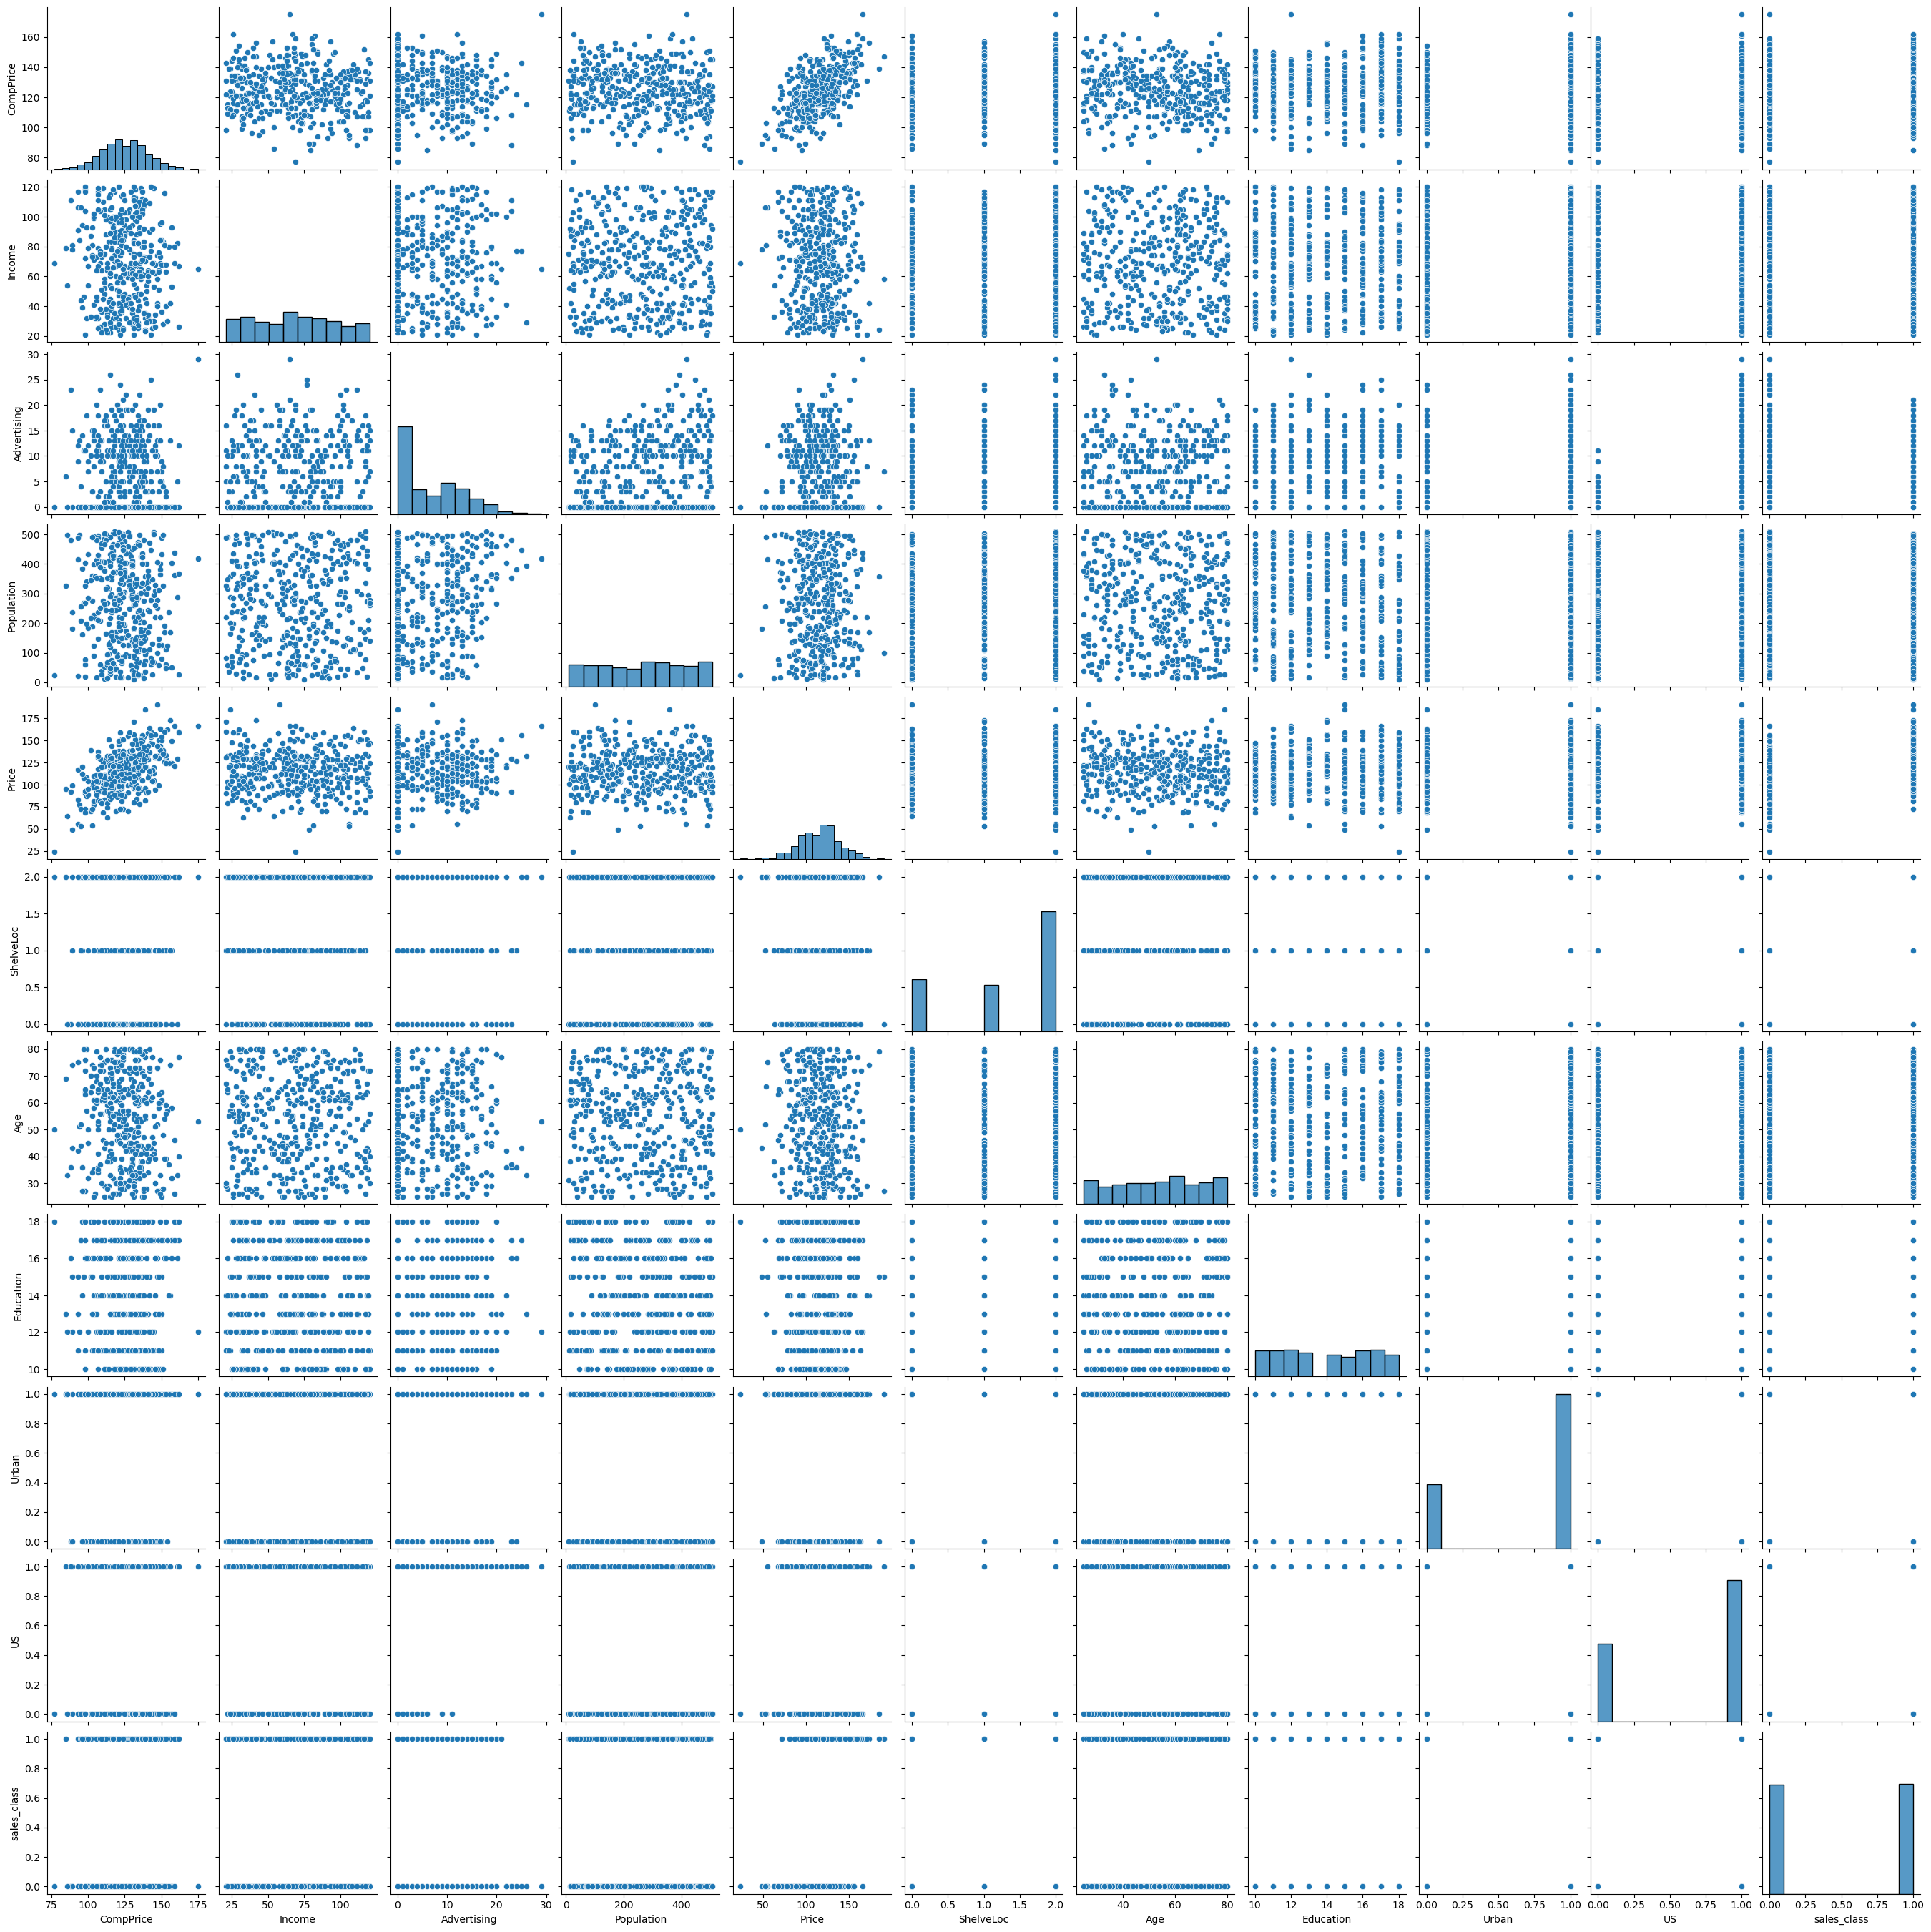

In [21]:
sns.pairplot(data1)

## Building Model

In [24]:
x=data1.iloc[:,:10]
y=data1.iloc[:,10:]

In [25]:
x.head(1)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1


In [26]:
y.head(1)

,sales_class
0,0


In [27]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)     # splitting the data

## Random Forest Classifier

In [75]:
model_rfc=RandomForestClassifier(n_estimators=1000,criterion='gini',max_depth=3)
model_rfc.fit(x_train,y_train)

C:\Users\sycmy\AppData\Local\Temp\ipykernel_28500\3483831607.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rfc.fit(x_train,y_train)


RandomForestClassifier(max_depth=3, n_estimators=1000)

In [76]:
# Prediction on training data
y_pred_train=model_rfc.predict(x_train)
pd.Series(y_pred_train).value_counts() 

1    176
0    144
dtype: int64

In [77]:
y_train.value_counts() 

sales_class
1              164
0              156
dtype: int64

In [78]:
# accuracy : training data
accuracy_score(y_train,y_pred_train)

0.85625

In [79]:
# Predicting on validation data
y_pred_val=model_rfc.predict(x_val)
pd.Series(y_pred_val).value_counts()

1    44
0    36
dtype: int64

In [80]:
y_val.value_counts()

sales_class
0              43
1              37
dtype: int64

In [81]:
# accuracy : validation data
accuracy_score(y_val,y_pred_val) 

0.7625

## Bagging

In [36]:
model_bagging=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=700,random_state=7)
model_bagging.fit(x_train,y_train)

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=700,
                  random_state=7)

In [37]:
# Prediction on training data
y_pred_train2=model_bagging.predict(x_train)
pd.Series(y_pred_train2).value_counts() 

1    164
0    156
dtype: int64

In [38]:
# accuracy : training data
accuracy_score(y_train,y_pred_train2)

1.0

In [39]:
# Predicting on validation data
y_pred_val2=model_bagging.predict(x_val)
pd.Series(y_pred_val2).value_counts()

1    46
0    34
dtype: int64

In [40]:
# accuracy : validation data
accuracy_score(y_val,y_pred_val2) 

0.7625

## Boosting

In [92]:
model_boosting=AdaBoostClassifier(n_estimators=10,random_state=7)
model_boosting.fit(x_train,y_train)

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=10, random_state=7)

In [93]:
# Prediction on training data
y_pred_train3=model_boosting.predict(x_train)
pd.Series(y_pred_train3).value_counts() 

0    168
1    152
dtype: int64

In [94]:
# accuracy : training data
accuracy_score(y_train,y_pred_train3)

0.825

In [95]:
# Predicting on validation data
y_pred_val3=model_boosting.predict(x_val)
pd.Series(y_pred_val3).value_counts()

1    41
0    39
dtype: int64

In [96]:
# accuracy : validation data
accuracy_score(y_val,y_pred_val3) 

0.75

## Stacking

In [46]:
estimators=[]
model1=LogisticRegression()
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('cart',model2))
model3=SVC()
estimators.append(('svm',model3))


model_stacking=VotingClassifier(estimators)
model_stacking.fit(x_train,y_train)

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('cart', DecisionTreeClassifier()),
                             ('svm', SVC())])

In [47]:
# Prediction on training data
y_pred_train4=model_stacking.predict(x_train)
pd.Series(y_pred_train4).value_counts() 

1    179
0    141
dtype: int64

In [48]:
# accuracy : training data
accuracy_score(y_train,y_pred_train4)

0.890625

In [49]:
# Predicting on validation data
y_pred_val4=model_stacking.predict(x_val)
pd.Series(y_pred_val4).value_counts()

1    46
0    34
dtype: int64

In [50]:
# accuracy : validation data
accuracy_score(y_val,y_pred_val4) 

0.7625

## XGBM

In [51]:
model_xgb=XGBClassifier()
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
# Prediction on training data
y_pred_train5=model_xgb.predict(x_train)
pd.Series(y_pred_train5).value_counts()

1    164
0    156
dtype: int64

In [53]:
# accuracy : training data
accuracy_score(y_train,y_pred_train5)

1.0

In [54]:
# Predicting on validation data
y_pred_val5=model_stacking.predict(x_val)
pd.Series(y_pred_val5).value_counts()

1    46
0    34
dtype: int64

In [55]:
# accuracy : validation data
accuracy_score(y_val,y_pred_val5)

0.7625

## LGBM

In [56]:
d_train = lgb.Dataset(x_train, label=y_train)

In [57]:
d_train

In [58]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'dart' 
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5 
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [59]:
model_lgb = lgb.train(params, d_train, 100)

[LightGBM] [Info] Number of positive: 164, number of negative: 156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 380
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512500 -> initscore=0.050010
[LightGBM] [Info] Start training from score 0.050010
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [60]:
# Prediction on training data
y_pred_train6=model_lgb.predict(x_train)

In [61]:
predictions_train=[round(value) for value in y_pred_train6]

In [62]:
# accuracy : training data
accuracy_score(y_train,predictions_train)

0.8125

In [63]:
# Predicting on validation data
y_pred_val6=model_lgb.predict(x_val)

In [64]:
predictions_val=[round(value) for value in y_pred_val6]

In [65]:
# accuracy : validation data
accuracy_score(y_val,predictions_val)

0.7125

In [97]:
# Random Forest, accuracy: train data: 0.85, val data: 0.76
# Bagging, accuracy: train data: 1.0, val data: 0.76
# Boosting, accuracy: train data: 0.825, val data: 0.75
# Stacking, accuracy: train data: 0.89, val data: 0.76
# XGBM, accuracy: train data: 1.0 , val data: 0.76
# LGBM, accuracy: train data: 0.81 , val data: 0.71

In [98]:
# Bagging and XGBM have high training accuracy which can cause overfitting.